In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [17]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
# 数据加载
power = pd.read_csv(filepath_or_buffer='datas/household_power_consumption_1000.txt',sep=';')

In [3]:
# 数据清洗、处理
power = power.dropna(axis=0,how='any') # 只要某一行有空数据，就进行行删除操作
power.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
def timeFormat(t):
    tp = time.strptime(' '.join(t),'%d/%m/%Y %H:%M:%S')
    return (tp.tm_year,tp.tm_mon,tp.tm_mday,tp.tm_hour,tp.tm_min,tp.tm_sec)

In [30]:
# 时间与功率
# 将时间（年、月、日、时、分、秒）看成特征属性 功率看出目标属性
date = power.iloc[:,:2]
X = date.apply(lambda x: pd.Series(timeFormat(x)),axis=1)
Y = power['Global_active_power']

# 训练集和测试集划分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 ,random_state = 214)

# 创建模型对象
linear_model = LinearRegression(fit_intercept=True)
# 模型训练
linear_model.fit(X_train, Y_train)
# 模型效果评估
# mse 越趋近与0效果越好
Y_predict = linear_model.predict(X_test)
mse = np.sum((Y_predict - Y_test)**2) /len(Y_predict)
print('线性回归效果mse：{}'.format(mse))
# rmse越趋近与0效果越好
rmse = np.sqrt(mse)
print('线性回归效果rmse：{}'.format(rmse))
# R2 最优解为1，
r2 = 1 - np.sum((Y_predict - Y_test)**2) / np.sum((Y_predict- np.mean(Y_test))**2)
r2
print('线性回归效果Score：{}'.format(linear_model.score(X_test,Y_test)))
print('线性回归参数：')
print(linear_model.coef_)
print('线性回归截距项：')
print(linear_model.intercept_)

线性回归效果mse：1.2872984834436894
线性回归效果rmse：1.1345917695116994
线性回归效果Score：0.11863062599031803
线性回归参数：
[  0.00000000e+00   2.98372438e-16  -2.76913422e+00  -1.06249822e-01
  -5.10649205e-03   0.00000000e+00]
线性回归截距项：
49.6661902692


In [60]:
# 利用梯度下降来做
sgd_model = SGDRegressor(max_iter=100)
sgd_model.fit(X_train, Y_train)
predict_sgd = sgd_model.predict(X_test)
print(predict_sgd)
print('梯度下降模型效果：{}'.format(sgd_model.score(X_test,Y_test)))
print(sgd_model.coef_)

[  9.89780763e+14   1.01422560e+15   1.07608910e+15   1.08008360e+15
   9.81791760e+14   1.01408089e+15   1.17827445e+15   9.98203881e+14
   1.09260975e+15   8.99803511e+14   1.10067110e+15   1.02285824e+15
   1.07987408e+15   1.07152331e+15   9.15890044e+14   1.07616145e+15
   9.60741499e+14   1.05539307e+15   1.04326486e+15   1.10470178e+15
   1.07983790e+15   1.10481031e+15   1.12532546e+15   1.15779547e+15
   1.10038923e+15   9.40833812e+14   1.15783165e+15   9.03761835e+14
   1.05557395e+15   1.08404946e+15   1.14948088e+15   1.00188033e+15
   1.02670803e+15   9.85540561e+14   1.06788304e+15   9.53142902e+14
   1.00619288e+15   9.52889668e+14   1.17409906e+15   1.00216221e+15
   1.05939510e+15   1.07209460e+15   9.97668770e+14   1.08019213e+15
   1.11255361e+15   9.03870364e+14   1.07566252e+15   9.85395856e+14
   1.08836201e+15   9.32446870e+14   1.03049301e+15   1.08394093e+15
   9.24204633e+14   9.69482670e+14   9.93992322e+14   1.00997786e+15
   9.52925844e+14   1.10085199e+15

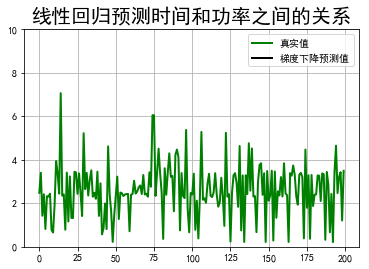

In [59]:

x_show = np.arange(len(X_test))
plt.plot(x_show,Y_test,c='g',linewidth=2,label = '真实值')
plt.plot(x_show,predict_sgd,c='black',linewidth=2,label = '梯度下降预测值')
plt.plot(x_show,Y_predict,c='r',linewidth=2,label = '线性回归预测值')

plt.ylim(0,10)
plt.legend()
plt.title("线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)#加网格
plt.show()